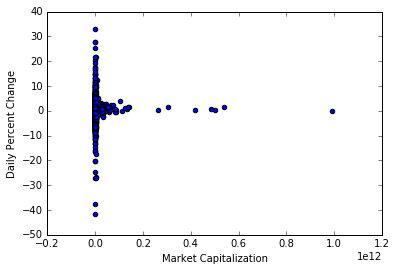

In [1]:
%matplotlib inline

"""
This program reads in a list of stocks,
downloads percentage change in share price from
Yahoo finance, and then compares this to the
market capitalization.

Written by: Victoria Gregory, N14207660
Date:       2/23/2016
"""

import matplotlib.pyplot as plt
import requests
import re

# initialize some lists for things we'll need
capnum = []     # market cap.
pct = []        # percent change in price
symbols = []    # list of symbols

# read in the file, skipping the first line
with open('company_list_corrected.csv') as f:
    lines = f.readlines()[1:]

for line in lines:
    # fix weird punctuation instances
    line = line.replace(',I',' I')
    line = line.replace(', ','')
    line = line.replace(',",','",')
    line = line.replace('"','')
    line = line.replace('\n','')

    # split up the line to get the relevant information
    symbol, name, cap = line.split(',')

    # fill the list with market cap, if available
    basenum = cap[:-1]
    units = cap[-1:]
    if units=='B':
       capnum.append(float(basenum)*1000000000)
    elif units=='M':
       capnum.append(float(basenum)*1000000)
    else:
       continue 
    symbols.append(symbol)


# pull data from Yahoo finance, 200 at a time
i=0
while i<len(symbols):
    j=i+200
    sym_list = '+'.join(symbols[i:j])

    # create the URL string
    url = 'http://finance.yahoo.com/d/quotes.csv?s=' + sym_list + '&f=p2'
    r=requests.get(url)

    # extract the actual numbers from the string
    p=re.findall("[-]?\d+[\.]?\d*",r.text)
    pct = pct + p
    i=j

# convert everything to floats
pct_f = [float(i) for i in pct]

# make scatter plot
plt.scatter(capnum,pct_f)
plt.xlabel('Market Capitalization')
plt.ylabel('Daily Percent Change')
plt.show()

According to the scatter plot, the companies with lower market capitalization appear to have higher variance in their daily price percentage change.